# Data Visualisation in Python

#### The aim of this Data Visualisation workshop is to build a scatterplot step by step using the <font color=blue>gapminder dataset</font>. This dataset provides information about the life expectancy, the Gross Domestic Product (GDP), and the population for each country in the world in 2016. Our scatterplot will include information about the Gross Domestic Product (GDP) (x axis) versus the life expectancy (y axis) worldwide.

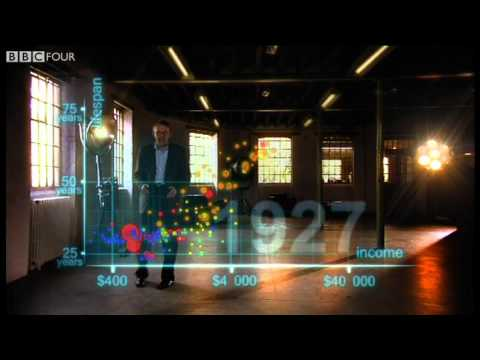

In [24]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('jbkSRLYSojo')

****

## Import the libraries

#### Python doesn’t load all the libraries by default. We have to add an import statement to our code to use the available functions of a library. Please check the next cell to learn how to import a library in Python.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### The following command is only applicable if you use Jupyter and is to let us plot within Jupyter ipython notebooks

In [2]:
%matplotlib inline

****
#### The following statement will load the gapminder dataset into the SWAN environment ready for processing:

In [ ]:
!TMPFILE='mktemp' ; wget -c https://jazzyhb.github.io/Data.zip -O $TMPFILE && unzip $TMPFILE && rm $TMPFILE

****

## Import the dataset as dataframe usings Pandas

#### A DataFrame is a 2-dimensional data structure that can store data of different types (including characters, integers, floating point numbers, factors and more) in columns. It is similar to a spreadsheet or an SQL table. A DataFrame always has an index (0-based). An index refers to the position of an element in the data structure. Let’s load the gapminder dataset in Python by using the read_csv function from the Pandas library:

In [ ]:
gapminder_2016 = pd.read_csv("./Data/gapminder_2016.csv")

#### <font color=red>Be careful with the path you use! If you get an error, it means that you are not in the correct location.</font>

#### Check the type of the variable gapminder_2016

In [ ]:
print(type(gapminder_2016))

#### If the statement returns <class 'pandas.core.frame.DataFrame'> then you have imported the gapminder dataset as a Pandas Data Frame in Python.
****

## Explore the dataset using Pandas

#### To check the variable type of each column of the data frame, we can use the dtypes command:

In [ ]:
print(gapminder_2016.dtypes)

#### The gap_2016_df dataframe includes 5 variables (columns), namely country, continent, life expectancy, Gross Domestic Product Per Capita in US dollars and population. The object type corresponds to characters (strings), float64 to a floating point number and int64 to an integer. <br> <br> Display the column names by using the columns command:

In [ ]:
print(gapminder_2016.columns)

#### Display the dimensions of the dataframe by using the shape command:

In [ ]:
print(gapminder_2016.shape)

#### So the gapminder_2016 dataset contains 190 rows and 5 columns.

#### Display the first few lines of the dataframe by using the head command (by default head without any argument will give you the first five rows):

In [ ]:
print(gapminder_2016.head())

#### Display the last few lines of the dataframe by using the tales command:

In [ ]:
print(gapminder_2016.tail())

#### Look at the column values:

In [ ]:
print(gapminder_2016.columns.values)

#### The previous command returns a list with all the column names as elements of this list.

#### Check the unique values in a column of the dataframe:

In [ ]:
print(pd.unique(gapminder_2016['continent']))

#### We can calculate basic statistics (such as count, average value, standard deviation, minimum and maximum values and more) for a column of the dataset using the describe command:

In [ ]:
print(gapminder_2016['pop'].describe(),'\n')

#### Let’s calculate the minimum, maximum, average, and standard deviation of the population worldwide, and count how many elements we have (number of countries) in the dataset:

In [ ]:
print("min=",gapminder_2016['pop'].min(),"\n")
print("max=",gapminder_2016['pop'].max(),"\n")
print("avg=",gapminder_2016['pop'].mean(),"\n")
print("std=",gapminder_2016['pop'].std(),"\n")
print("count=",gapminder_2016['pop'].count(),"\n")

#### <font color=red>NOTE: The \n within the print command stands for new line, so it tells print to add a new line after the command is executed.</font>

#### Calculate summary statistics grouped by subsets or attributes within fields of our data. For example, we might want to calculate the some basic statistics per continent, or to calculate the average values for life expectancy, GDP per capita and population per continent.

In [ ]:
# Group data by continent
grouped_df = gapminder_2016.groupby('continent')
# Calculate basic statistics for the group data by continent
grouped_df.describe()

In [ ]:
grouped_df.mean()

#### Group data using two or more columns. Here we group by continent and then by country and we calculate the average value:

In [ ]:
grouped_data2 = gapminder_2016.groupby(['continent','country'])
grouped_data2.mean()

#### Select a ‘subset’ of the data, i.e. only the country names, using the column name (Column Headings):

In [ ]:
print(gapminder_2016['country'])

#### Select rows and columns from the dataset using iloc. In this example, we select the first 3 rows and the first 4 columns:

In [ ]:
# When we ask for 0:3, we are actually telling Python to start at index 0 and select rows 0, 1, 2 up to but not including 3.
gapminder_2016.iloc[0:3, 0:4]

#### Select all columns for rows of index values 0 and 10:

In [ ]:
gapminder_2016.loc[[0, 10], :]

#### Select the first row and the country, continent and pop columns (labels):

In [ ]:
gapminder_2016.loc[[0], ['country', 'continent', 'pop']]

#### we can also slice the dataset using conditions. Here, we select all the countries that belong to ‘Americas’ continent:

In [ ]:
gapminder_2016[gapminder_2016.continent == 'Americas']

#### or we can select the countries where GDP Per Capita is less than 2,000 USD:

In [ ]:
gapminder_2016[gapminder_2016.gdpPercap < 2000]

#### We can also combine conditions. For example, we can select a subset of countries that have GDP Per Capita less than 15,000 USD and belong to ‘Europe’ continent:

In [ ]:
gapminder_2016[(gapminder_2016.gdpPercap < 15000) & (gapminder_2016.continent == 'Europe')]

#### Use the isin command in Python to query a dataframe using a list of options to match. Here, we select all countries that belong to Asian and Oceania:

In [ ]:
gapminder_2016[gapminder_2016['continent'].isin(['Asia', 'Oceania'])]

## Creating a scatterplot: step by step guide

#### As mentioned before, the goal is to create a scatterplot with the Gross Domestic Product in the x axis and the life expectancy in the y axis for all the countries in the gapminder 2016 dataset.

#### We can start by plotting a basic scatterplot. In seabron 0.9.0, the function to create a scatterplot is called scatterplot, and we need to pass the values for three parameters, i.e. the values for the x axis, the values for the y axis, and the name of the dataframe (dataset to look for this values:

#### <font color=red>PLEASE NOTE: that in previous versions of seaborn (before seaborn 0.9.0), scatterplot is not available. Use the lmplot function instead. Be careful though, as the lmplot function is slightly different than scatterplot.</font>

In [ ]:
####################################################################################
# Plot the scatterplot
####################################################################################

fig1=sns.scatterplot(x='gdpPercap', y='lifeExp', data=gapminder_2016, # Choose the x and y values and the dataframe 
          )

#### <font color=red>PLEASE NOTE: for the x and y axis, we need just to pass the column names of the dataframe. This is because by providing the data input parameter, seaborn scans the dataframe and extracts the information for the columns..</font>

#### We can make the figure bigger by using the figsize of the matplotlib figure function:

In [ ]:
####################################################################################
# Plot the scatterplot
####################################################################################

# Make the figure bigger
plt.figure(figsize=(14,10))

sns.scatterplot(x='gdpPercap', y='lifeExp', data=gapminder_2016, # Choose the x and y values and the dataframe 
          )

#### Here, we modify the marker style using the markers parameter in scatterplot:

In [ ]:
####################################################################################
# Plot the scatterplot
####################################################################################

# Make the figure bigger
plt.figure(figsize=(14,10))

fig1=sns.scatterplot(x='gdpPercap', y='lifeExp', data=gapminder_2016, # Choose the x and y values and the dataframe 
                     markers="o", # Change the markers' style
          )

#### Change the size of the markers in the figure using the s parameter:

In [ ]:
####################################################################################
# Plot the scatterplot
####################################################################################

# Make the figure bigger
plt.figure(figsize=(14,10))

fig1=sns.scatterplot(x='gdpPercap', y='lifeExp', data=gapminder_2016, # Choose the x and y values and the dataframe 
                     markers="o", # Change the markers' style
                     s=140, # Change the size of the markers 
          )

#### Modify the color of the markers using the color parameter:

In [ ]:
####################################################################################
# Plot the scatterplot
####################################################################################

# Make the figure bigger
plt.figure(figsize=(14,10))

fig1=sns.scatterplot(x='gdpPercap', y='lifeExp', data=gapminder_2016, # Choose the x and y values and the dataframe 
                     markers="o", # Change the markers' style
                     s=140, # Change the size of the markers 
                     color="black", # Change the color of the markers
          )

#### Change the edge color and the edge line of the markers by using the edgecolor and linewidht parameters:

In [ ]:
####################################################################################
# Plot the scatterplot
####################################################################################

# Make the figure bigger
plt.figure(figsize=(14,10))

fig1=sns.scatterplot(x='gdpPercap', y='lifeExp', data=gapminder_2016, # Choose the x and y values and the dataframe 
                     markers="o", # Change the markers' style
                     s=140, # Change the size of the markers 
                     color="black", # Change the color of the markers
                     edgecolor= "white", # Change the edge color of the markers
                     linewidth=2, # Change the edge linewidth of the markers
          )

#### Change the opacity of the markers using the alpha parameters of scatterplot:

In [ ]:
####################################################################################
# Plot the scatterplot
####################################################################################

# Make the figure bigger
plt.figure(figsize=(14,10))

fig1=sns.scatterplot(x='gdpPercap', y='lifeExp', data=gapminder_2016, # Choose the x and y values and the dataframe 
                     markers="o", # Change the markers' style
                     s=140, # Change the size of the markers 
                     color="black", # Change the color of the markers
                     edgecolor= "white", # Change the edge color of the markers
                     linewidth=2, # Change the edge linewidth of the markers
                     alpha=0.8, # Change the opacity of the markers
          )

#### You can differentiate the color of the markers by continent (countries that belong in the same continenet will be displayed with the same color) by passing the continent variable in the hue parameter:

In [ ]:
####################################################################################
# Plot the scatterplot
####################################################################################

# Make the figure bigger
plt.figure(figsize=(14,10))

fig1=sns.scatterplot(x='gdpPercap', y='lifeExp', data=gapminder_2016, # Choose the x and y values and the dataframe 
                     hue='continent', # Color by condinent
                     markers="o", # Change the markers' style
                     s=140, # Change the size of the markers 
                     edgecolor= "white", # Change the edge color of the markers
                     linewidth=1, # Change the edge linewidth of the markers
          )

#### Let’s change the colour palette according to the colors used in the olympic flag:

In [ ]:
####################################################################################
# Plot the scatterplot
####################################################################################

# Make the figure bigger
plt.figure(figsize=(14,10))

fig1=sns.scatterplot(x='gdpPercap', y='lifeExp', data=gapminder_2016, # Choose the x and y values and the dataframe 
                     hue='continent', # Color by condinent
                     markers="o", # Change the markers' style
                     s=140, # Change the size of the markers 
                     edgecolor= "white", # Change the edge color of the markers
                     linewidth=1, # Change the edge linewidth of the markers
                     palette=dict(Africa="black", Asia=(0.8, 0.8, 0), # Change the colors according to the 
                                  Americas="red", Europe="blue", # olympic flag
                                  Oceania="green")
          )

#### By adding the size parameter, we can differentiate the marker size by the population (pop variable) of each country:

In [ ]:
####################################################################################
# Plot the scatterplot
####################################################################################

# Make the figure bigger
plt.figure(figsize=(14,10))

fig1=sns.scatterplot(x='gdpPercap', y='lifeExp', data=gapminder_2016, # Choose the x and y values and the dataframe 
                     hue='continent', # Color by condinent
                     size='pop', # Size of markers by population
                     markers="o", # Change the markers' style
                     s=140, # Change the size of the markers 
                     edgecolor= "white", # Change the edge color of the markers
                     linewidth=1, # Change the edge linewidth of the markers
                     palette=dict(Africa="black", Asia=(0.8, 0.8, 0), # Change the colors according to the 
                                  Americas="red", Europe="blue", # olympic flag
                                  Oceania="green")
          )

#### Change the scale of the marker sizes by setting the minimum and maximum value:

In [ ]:
####################################################################################
# Plot the scatterplot
####################################################################################

# Make the figure bigger
plt.figure(figsize=(14,10))

fig1=sns.scatterplot(x='gdpPercap', y='lifeExp', data=gapminder_2016, # Choose the x and y values and the dataframe 
                     hue='continent', # Color by condinent
                     size='pop', # Size of markers by population
                     sizes=(20, 2000), # minimum and maximum marker size
                     markers="o", # Change the markers' style
                     s=140, # Change the size of the markers 
                     edgecolor= "white", # Change the edge color of the markers
                     linewidth=1, # Change the edge linewidth of the markers
                     palette=dict(Africa="black", Asia=(0.8, 0.8, 0), # Change the colors according to the 
                                  Americas="red", Europe="blue", # olympic flag
                                  Oceania="green")
          )

#### Seaborn and matlplot libraries can be combined for better results. Modify the existing legend by using matplotlib (plt.legend), which gives you more options for configurations:

In [ ]:
####################################################################################
# Plot the scatterplot
####################################################################################

# Make the figure bigger
plt.figure(figsize=(14,10))

# Change the minimum and maximum point size
fig1=sns.scatterplot(x='gdpPercap', y='lifeExp', data=gapminder_2016, # Choose the x and y values and the dataframe 
                     hue='continent', # Color by condinent
                     size='pop', # Size of markers by population
                     sizes=(20, 2000), # minimum and maximum marker size
                     markers="o", # Change the markers' style
                     s=140, # Change the size of the markers 
                     edgecolor= "white", # Change the edge color of the markers
                     linewidth=1, # Change the edge linewidth of the markers
                     palette=dict(Africa="black", Asia=(0.8, 0.8, 0), # Change the colors according to the 
                                  Americas="red", Europe="blue", # olympic flag
                                  Oceania="green")
          )


####################################################################################
# Use the matplotlib library to edit the plot
####################################################################################

# Legend
lgd = plt.legend(loc="lower right", frameon = 0.5, framealpha=0.8, # Create a legend and define its location, frame and frame alpha
                 edgecolor='white', facecolor='white', ncol=2, # Edgecolor, facecolor and the number of columns
                 title='', fontsize=14, # the title and the font size
                 handlelength=2, handleheight=2, 
                 markerscale=0.7) 

#### Let’s modify now the x and y limits of the figure (plt.xlim and plt.ylim) and add labels for the x (plt.xlabel) and y (plt.ylabel) axis:

In [ ]:
####################################################################################
# Plot the scatterplot
####################################################################################

# Make the plot bigger
plt.figure(figsize=(14,10))

# Change the minimum and maximum point size
fig1=sns.scatterplot(x='gdpPercap', y='lifeExp', data=gapminder_2016, # Choose the x and y values and the dataframe 
                     hue='continent', # Color by condinent
                     size='pop', # Size of markers by population
                     sizes=(20, 2000), # minimum and maximum marker size
                     markers="o", # Change the markers' style
                     s=140, # Change the size of the markers 
                     edgecolor= "white", # Change the edge color of the markers
                     linewidth=1, # Change the edge linewidth of the markers
                     palette=dict(Africa="black", Asia=(0.8, 0.8, 0), # Change the colors according to the 
                                  Americas="red", Europe="blue", # olympic flag
                                  Oceania="green")
          )


####################################################################################
# Use the matplotlib library to edit the plot
####################################################################################

# Legend
lgd = plt.legend(loc="lower right", frameon = 0.5, framealpha=0.8, # Create a legend and define its location, frame and frame alpha
                 edgecolor='white', facecolor='white', ncol=2, # Edgecolor, facecolor and the number of columns
                 title='', fontsize=14, # the title and the font size
                 handlelength=2, handleheight=2, 
                 markerscale=0.7) 

# x, y limits and labels
plt.xlim(-10000, 160000) # Change the x axis limits
plt.ylim(40, 90) # Change the y axis limits
plt.xlabel('GDP Per Capita [$USD]', fontsize=16) # Add the x axis label
plt.ylabel('Life Expectancy [years]', fontsize=16) # Add the y axis label

#### Modify the x and y ticks (plt.xticks, plt.yticks and plt.tick_params()) and add grid lines (plt.grid(True)):

In [ ]:
####################################################################################
# Plot the scatterplot
####################################################################################

# Make the plot bigger
plt.figure(figsize=(14,10))

# Change the minimum and maximum point size
fig1=sns.scatterplot(x='gdpPercap', y='lifeExp', data=gapminder_2016, # Choose the x and y values and the dataframe 
                     hue='continent', # Color by condinent
                     size='pop', # Size of markers by population
                     sizes=(20, 2000), # minimum and maximum marker size
                     markers="o", # Change the markers' style
                     s=140, # Change the size of the markers 
                     edgecolor= "white", # Change the edge color of the markers
                     linewidth=1, # Change the edge linewidth of the markers
                     palette=dict(Africa="black", Asia=(0.8, 0.8, 0), # Change the colors according to the 
                                  Americas="red", Europe="blue", # olympic flag
                                  Oceania="green")
          )


####################################################################################
# Use the matplotlib library to edit the plot
####################################################################################

# Legend
lgd = plt.legend(loc="lower right", frameon = 0.5, framealpha=0.8, # Create a legend and define its location, frame and frame alpha
                 edgecolor='white', facecolor='white', ncol=2, # Edgecolor, facecolor and the number of columns
                 title='', fontsize=14, # the title and the font size
                 handlelength=2, handleheight=2, 
                 markerscale=0.7) 

# x, y limits and labels
plt.xlim(-10000, 160000) # Change the x axis limits
plt.ylim(40, 90) # Change the y axis limits
plt.xlabel('GDP Per Capita [$USD]', fontsize=16) # Add the x axis label
plt.ylabel('Life Expectancy [years]', fontsize=16) # Add the y axis label

# x,y ticks and grid
plt.xticks([0, 50000, 100000, 150000]) # Change the xticks spacing using standard labels
plt.yticks(range(40,90,10)) # Change the yticks spacing using a range of values
plt.tick_params(axis='both', labelsize=14) # Change the parameters for the x and y axis
plt.grid(True) # Display the grid lines

#### Add a title (plt.title) in the figure. Let’s also create a text to provide some useful information for our dataset, such as the average life expectancy and the average GDP per capita worldwide. We do this by adding it as a text within the figure (plt.text):

In [ ]:
####################################################################################
# Plot the scatterplot
####################################################################################

# Make the plot bigger
plt.figure(figsize=(14,10))

# Change the minimum and maximum point size
fig1=sns.scatterplot(x='gdpPercap', y='lifeExp', data=gapminder_2016, # Choose the x and y values and the dataframe 
                     hue='continent', # Color by condinent
                     size='pop', # Size of markers by population
                     sizes=(20, 2000), # minimum and maximum marker size
                     markers="o", # Change the markers' style
                     s=140, # Change the size of the markers 
                     edgecolor= "white", # Change the edge color of the markers
                     linewidth=1, # Change the edge linewidth of the markers
                     palette=dict(Africa="black", Asia=(0.8, 0.8, 0), # Change the colors according to the 
                                  Americas="red", Europe="blue", # olympic flag
                                  Oceania="green")
          )


####################################################################################
# Use the matplotlib library to edit the plot
####################################################################################

# Legend
lgd = plt.legend(loc="lower right", frameon = 0.5, framealpha=0.8, # Create a legend and define its location, frame and frame alpha
                 edgecolor='white', facecolor='white', ncol=2, # Edgecolor, facecolor and the number of columns
                 title='', fontsize=14, # the title and the font size
                 handlelength=2, handleheight=2, 
                 markerscale=0.7) 

# x, y limits and labels
plt.xlim(-10000, 160000) # Change the x axis limits
plt.ylim(40, 90) # Change the y axis limits
plt.xlabel('GDP Per Capita [$USD]', fontsize=16) # Add the x axis label
plt.ylabel('Life Expectancy [years]', fontsize=16) # Add the y axis label

# x,y ticks and grid
plt.xticks([0, 50000, 100000, 150000]) # Change the xticks spacing using standard labels
plt.yticks(range(40,90,10)) # Change the yticks spacing using a range of values
plt.tick_params(axis='both', labelsize=14) # Change the parameters for the x and y axis
plt.grid(True) # Display the grid lines

# Calculate the average life expectancy worldwide
avg_lifeExp = round(sum(gapminder_2016['lifeExp'] * gapminder_2016['pop'])/sum(gapminder_2016['pop']),2)
# Calculate the average GDP per capita worldwide
avg_gdp = round(sum(gapminder_2016['gdpPercap'] * gapminder_2016['pop'])/sum(gapminder_2016['pop']),2)
# Define the subtitle that will be used in the subtitle of the graph showing the average life 
# expectancy and GDP per capita worldwide
my_subtitle="Average  life  expectancy  worldwide: %s  years.\nAverage GDP per capita worldwide: %s $US" % (avg_lifeExp, avg_gdp)

plt.title('GapMinder 2016', fontsize=18, y=1.06, x=0.1) # Add the plot title and change the x and y location of the title
plt.text(90000,86.5, my_subtitle, size=12, backgroundcolor="white")

#### And that’s the final figure. It looks much better than the initial figure, right? We also provide much more information in our final figure compared to the initial on

#### You can save (export) the figure you just created by using the savefig command. You can also specify some parameters in the savefig, such as the resolution of the figure (dpi) and the transparency of the background (transparent=True):

In [ ]:
####################################################################################
# Plot the scatterplot
####################################################################################

# Make the plot bigger
plt.figure(figsize=(14,10))

# Change the minimum and maximum point size
fig1=sns.scatterplot(x='gdpPercap', y='lifeExp', data=gapminder_2016, # Choose the x and y values and the dataframe 
                     hue='continent', # Color by condinent
                     size='pop', # Size of markers by population
                     sizes=(20, 2000), # minimum and maximum marker size
                     markers="o", # Change the markers' style
                     s=140, # Change the size of the markers 
                     edgecolor= "white", # Change the edge color of the markers
                     linewidth=1, # Change the edge linewidth of the markers
                     palette=dict(Africa="black", Asia=(0.8, 0.8, 0), # Change the colors according to the 
                                  Americas="red", Europe="blue", # olympic flag
                                  Oceania="green")
          )


####################################################################################
# Use the matplotlib library to edit the plot
####################################################################################

# Legend
lgd = plt.legend(loc="lower right", frameon = 0.5, framealpha=0.8, # Create a legend and define its location, frame and frame alpha
                 edgecolor='white', facecolor='white', ncol=2, # Edgecolor, facecolor and the number of columns
                 title='', fontsize=14, # the title and the font size
                 handlelength=2, handleheight=2, 
                 markerscale=0.7) 

# x, y limits and labels
plt.xlim(-10000, 160000) # Change the x axis limits
plt.ylim(40, 90) # Change the y axis limits
plt.xlabel('GDP Per Capita [$USD]', fontsize=16) # Add the x axis label
plt.ylabel('Life Expectancy [years]', fontsize=16) # Add the y axis label

# x,y ticks and grid
plt.xticks([0, 50000, 100000, 150000]) # Change the xticks spacing using standard labels
plt.yticks(range(40,90,10)) # Change the yticks spacing using a range of values
plt.tick_params(axis='both', labelsize=14) # Change the parameters for the x and y axis
plt.grid(True) # Display the grid lines

# Calculate the average life expectancy worldwide
avg_lifeExp = round(sum(gapminder_2016['lifeExp'] * gapminder_2016['pop'])/sum(gapminder_2016['pop']),2)
# Calculate the average GDP per capita worldwide
avg_gdp = round(sum(gapminder_2016['gdpPercap'] * gapminder_2016['pop'])/sum(gapminder_2016['pop']),2)
# Define the subtitle that will be used in the subtitle of the graph showing the average life 
# expectancy and GDP per capita worldwide
my_subtitle="Average  life  expectancy  worldwide: %s  years.\nAverage GDP per capita worldwide: %s $US" % (avg_lifeExp, avg_gdp)

plt.title('GapMinder 2016', fontsize=18, y=1.06, x=0.1) # Add the plot title and change the x and y location of the title
plt.text(90000,86.5, my_subtitle, size=12, backgroundcolor="white")


####################################################################################
# Save the figure
####################################################################################
myplot = fig1.get_figure()
myplot.savefig("my_first_plot.png", dpi=300, transparent=True)